<h1>Feature Engineering<h1>

# Importing packages and Data

In [ ]:
import pandas as pd
import numpy as np # linear algebra
import matplotlib.pyplot as plt #data plot
import seaborn as sns #data plot
import warnings
warnings.filterwarnings("ignore") #ignore warning

In [ ]:
%matplotlib inline

In [ ]:
df = pd.read_csv('churn_data.csv') #this file is output generted on task2
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [ ]:
df.head(3)

Unnamed: 0                                id  \
0           0  24011ae4ebbe3035111d65fa7c15bc57   
1           1  d29c2c54acc38ff3c0614d0a653813dd   
2           2  764c75f661154dac3a6c254cd082ea7d   

                      channel_sales  cons_12m  cons_gas_12m  cons_last_month  \
0  foosdfpfkusacimwkcsosbicdxkicaua         0         54946                0   
1                           MISSING      4660             0                0   
2  foosdfpfkusacimwkcsosbicdxkicaua       544             0                0   

  date_activ   date_end date_modif_prod date_renewal  ...  \
0 2013-06-15 2016-06-15      2015-11-01   2015-06-23  ...   
1 2009-08-21 2016-08-30      2009-08-21   2015-08-31  ...   
2 2010-04-16 2016-04-16      2010-04-16   2015-04-17  ...   

   mean_year_price_off_peak_var  mean_year_price_peak_var  \
0                      0.131756                  0.092638   
1                      0.147600                  0.000000   
2                      0.167798                  0.088409   

   mean_year_price_mid_peak_var  mean_year_price_off_peak_fix  \
0                      0.036909                     42.497907   
1                      0.000000                     44.444710   
2                      0.000000                     44.444710   

   mean_year_price_peak_fix  mean_year_price_mid_peak_fix  \
0                 12.218665                      8.145777   
1                  0.000000                      0.000000   
2                  0.000000                      0.000000   

   mean_year_price_off_peak mean_year_price_peak  mean_year_price_med_peak  \
0                 42.629663            12.311304                  8.182687   
1                 44.592310             0.000000                  0.000000   
2                 44.612508             0.088409                  0.000000   

   churn  
0      1  
1      0  
2      0  

[3 rows x 54 columns]

In [ ]:
#droping the 'Unnamed' column
df.drop(columns = 'Unnamed: 0', inplace=True)

In [ ]:
df.shape

(14605, 53)

In [ ]:
df.dtypes

id                                        object
channel_sales                             object
cons_12m                                   int64
cons_gas_12m                               int64
cons_last_month                            int64
date_activ                        datetime64[ns]
date_end                          datetime64[ns]
date_modif_prod                   datetime64[ns]
date_renewal                      datetime64[ns]
forecast_cons_12m                        float64
forecast_cons_year                         int64
forecast_discount_energy                 float64
forecast_meter_rent_12m                  float64
forecast_price_energy_off_peak           float64
forecast_price_energy_peak               float64
forecast_price_pow_off_peak              float64
has_gas                                   object
imp_cons                                 float64
margin_gross_pow_ele                     float64
margin_net_pow_ele                       float64
nb_prod_act         

# Feature engineering

Difference between off-peak prices in December and preceding January

Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

In [ ]:
price_df = pd.read_csv('price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

id price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745 2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745 2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745 2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745 2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745 2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

In [ ]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

id  offpeak_diff_dec_january_energy  \
0  0002203ffbb812588b632b9e628cc38d                        -0.006192   
1  0004351ebdd665e6ee664792efc4fd13                        -0.004104   
2  0010bcc39e42b3c2131ed2ce55246e3c                         0.050443   
3  0010ee3855fdea87602a5b7aba8e42de                        -0.010018   
4  00114d74e963e47177db89bc70108537                        -0.003994   

   offpeak_diff_dec_january_power  
0                        0.162916  
1                        0.177779  
2                        1.500000  
3                        0.162916  
4                       -0.000001

In [ ]:
monthly_price_by_id.head()

id price_date  price_off_peak_var  \
0  0002203ffbb812588b632b9e628cc38d 2015-01-01            0.126098   
1  0002203ffbb812588b632b9e628cc38d 2015-02-01            0.126098   
2  0002203ffbb812588b632b9e628cc38d 2015-03-01            0.128067   
3  0002203ffbb812588b632b9e628cc38d 2015-04-01            0.128067   
4  0002203ffbb812588b632b9e628cc38d 2015-05-01            0.128067   

   price_off_peak_fix  
0           40.565969  
1           40.565969  
2           40.728885  
3           40.728885  
4           40.728885

In [ ]:
df = pd.merge(df, diff, on='id')
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  \
0      2015-11-01   2015-06-23               0.00  ...   
1      2009-08-21   2015-08-31             189.95  ...   
2      2010-04-16   2015-04-17              47.96  ...   
3      2010-03-30   2015-03-31             240.04  ...   
4      2010-01-13   2015-03-09             445.75  ...   

   mean_year_price_mid_peak_var  mean_year_price_off_peak_fix  \
0                      0.036909                     42.497907   
1                      0.000000                     44.444710   
2                      0.000000                     44.444710   
3                      0.000000                     44.444710   
4                      0.073719                     40.728885   

   mean_year_price_peak_fix  mean_year_price_mid_peak_fix  \
0                 12.218665                      8.145777   
1                  0.000000                      0.000000   
2                  0.000000                      0.000000   
3                  0.000000                      0.000000   
4                 24.437330                     16.291555   

   mean_year_price_off_peak  mean_year_price_peak mean_year_price_med_peak  \
0                 42.629663             12.311304                 8.182687   
1                 44.592310              0.000000                 0.000000   
2                 44.612508              0.088409                 0.000000   
3                 44.593296              0.000000                 0.000000   
4                 40.848791             24.539003                16.365274   

   churn  offpeak_diff_dec_january_energy  offpeak_diff_dec_january_power  
0      1                         0.020057                        3.700961  
1      0                        -0.003767                        0.177779  
2      0                        -0.004670                        0.177779  
3      0                        -0.004547                        0.177779  
4      0                        -0.006192                        0.162916  

[5 rows x 55 columns]

In [ ]:
# Droping the datetime columns ince we dont need them
remove = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']
df = df.drop(columns=remove)
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0         0         54946                0               0.00   
1      4660             0                0             189.95   
2       544             0                0              47.96   
3      1584             0                0             240.04   
4      4425             0              526             445.75   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0                   0                       0.0                     1.78   
1                   0                       0.0                    16.27   
2                   0                       0.0                    38.72   
3                   0                       0.0                    19.83   
4                 526                       0.0                   131.73   

   forecast_price_energy_off_peak  ...  mean_year_price_mid_peak_var  \
0                        0.114481  ...                      0.036909   
1                        0.145711  ...                      0.000000   
2                        0.165794  ...                      0.000000   
3                        0.146694  ...                      0.000000   
4                        0.116900  ...                      0.073719   

   mean_year_price_off_peak_fix mean_year_price_peak_fix  \
0                     42.497907                12.218665   
1                     44.444710                 0.000000   
2                     44.444710                 0.000000   
3                     44.444710                 0.000000   
4                     40.728885                24.437330   

   mean_year_price_mid_peak_fix  mean_year_price_off_peak  \
0                      8.145777                 42.629663   
1                      0.000000                 44.592310   
2                      0.000000                 44.612508   
3                      0.000000                 44.593296   
4                     16.291555                 40.848791   

   mean_year_price_peak  mean_year_price_med_peak  churn  \
0             12.311304                  8.182687      1   
1              0.000000                  0.000000      0   
2              0.088409                  0.000000      0   
3              0.000000                  0.000000      0   
4             24.539003                 16.365274      0   

   offpeak_diff_dec_january_energy offpeak_diff_dec_january_power  
0                         0.020057                       3.700961  
1                        -0.003767                       0.177779  
2                        -0.004670                       0.177779  
3                        -0.004547                       0.177779  
4                        -0.006192                       0.162916  

[5 rows x 51 columns]

## Transform Categorical Data

In [ ]:
#For the column has_gas, replace t for 1 and f for 0
df['has_gas']=df['has_gas'].replace(['t','f'],[1,0])
df['channel_sales'].value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    6753
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

In [ ]:
df['origin_up'].value_counts()

lxidpiddsbxsbosboudacockeimpuepw    7096
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64

In [ ]:
#Onehot encoding
df = pd.get_dummies(df, columns = ['channel_sales', 'origin_up'])
df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  d29c2c54acc38ff3c0614d0a653813dd      4660             0                0   
2  764c75f661154dac3a6c254cd082ea7d       544             0                0   
3  bba03439a292a1e166f80264c16191cb      1584             0                0   
4  149d57cf92fc41cf94415803a877cb4b      4425             0              526   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0               0.00                   0                       0.0   
1             189.95                   0                       0.0   
2              47.96                   0                       0.0   
3             240.04                   0                       0.0   
4             445.75                 526                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                     1.78                        0.114481   
1                    16.27                        0.145711   
2                    38.72                        0.165794   
3                    19.83                        0.146694   
4                   131.73                        0.116900   

   forecast_price_energy_peak  ...  \
0                    0.098142  ...   
1                    0.000000  ...   
2                    0.087899  ...   
3                    0.000000  ...   
4                    0.100015  ...   

   channel_sales_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                               1   
1                                               0   
2                                               1   
3                                               0   
4                                               0   

   channel_sales_lmkebamcaaclubfxadlmueccxoimlema  \
0                                               0   
1                                               0   
2                                               0   
3                                               1   
4                                               0   

   channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   channel_sales_usilxuppasemubllopkaafesmlibmsdf  origin_up_MISSING  \
0                                               0                  0   
1                                               0                  0   
2                                               0                  0   
3                                               0                  0   
4                                               0                  0   

   origin_up_ewxeelcelemmiwuafmddpobolfuxioce  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                           0   
1                                           1   
2                                           1   
3                                           1   
4                                           1   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  \
0                                           1   
1                                           0   
2                                           0   
3                                           0   
4        

In [ ]:
#removeing the values with very little occurences
df = df.drop(columns=['channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds', 'channel_sales_epumfxlbckeskwekxbiuasklxalciiuu','channel_sales_fixdbufsefwooaasfcxdxadsiekoceaa','origin_up_MISSING', 'origin_up_usapbepcfoloekilkwsdiboslwaxobdp', 'origin_up_ewxeelcelemmiwuafmddpobolfuxioce'])
df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  d29c2c54acc38ff3c0614d0a653813dd      4660             0                0   
2  764c75f661154dac3a6c254cd082ea7d       544             0                0   
3  bba03439a292a1e166f80264c16191cb      1584             0                0   
4  149d57cf92fc41cf94415803a877cb4b      4425             0              526   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0               0.00                   0                       0.0   
1             189.95                   0                       0.0   
2              47.96                   0                       0.0   
3             240.04                   0                       0.0   
4             445.75                 526                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                     1.78                        0.114481   
1                    16.27                        0.145711   
2                    38.72                        0.165794   
3                    19.83                        0.146694   
4                   131.73                        0.116900   

   forecast_price_energy_peak  ...  offpeak_diff_dec_january_energy  \
0                    0.098142  ...                         0.020057   
1                    0.000000  ...                        -0.003767   
2                    0.087899  ...                        -0.004670   
3                    0.000000  ...                        -0.004547   
4                    0.100015  ...                        -0.006192   

   offpeak_diff_dec_january_power  channel_sales_MISSING  \
0                        3.700961                      0   
1                        0.177779                      1   
2                        0.177779                      0   
3                        0.177779                      0   
4                        0.162916                      1   

   channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   channel_sales_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                               1   
1                                               0   
2                                               1   
3                                               0   
4                                               0   

   channel_sales_lmkebamcaaclubfxadlmueccxoimlema  \
0                                               0   
1                                               0   
2                                               0   
3                                               1   
4                                               0   

   channel_sales_usilxuppasemubllopkaafesmlibmsdf  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                           0   
1                                           1   
2                                           1   
3                                           1   
4                                           1   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  
0                                           1  
1       

## Transform Numerical Data

In [ ]:
numeric_features = df[[
    'cons_12m',
    'cons_gas_12m',
    'cons_last_month',
    'forecast_cons_12m',
    'forecast_cons_year',
    'forecast_discount_energy',
    'forecast_meter_rent_12m',
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak',
    'forecast_price_pow_off_peak'
]]
numeric_features.describe().T

count           mean            std  min  \
cons_12m                        14605.0  159230.267032  573483.629064  0.0   
cons_gas_12m                    14605.0   28091.082506  162978.563803  0.0   
cons_last_month                 14605.0   16091.371448   64366.262314  0.0   
forecast_cons_12m               14605.0    1868.638618    2387.651549  0.0   
forecast_cons_year              14605.0    1399.858747    3247.876793  0.0   
forecast_discount_energy        14605.0       0.966450       5.108355  0.0   
forecast_meter_rent_12m         14605.0      63.090448      66.166636  0.0   
forecast_price_energy_off_peak  14605.0       0.137282       0.024623  0.0   
forecast_price_energy_peak      14605.0       0.050488       0.049037  0.0   
forecast_price_pow_off_peak     14605.0      43.130085       4.486140  0.0   

                                        25%           50%           75%  \
cons_12m                        5674.000000  14116.000000  40764.000000   
cons_gas_12m                       0.000000      0.000000      0.000000   
cons_last_month                    0.000000    793.000000   3383.000000   
forecast_cons_12m                494.980000   1112.610000   2402.270000   
forecast_cons_year                 0.000000    314.000000   1746.000000   
forecast_discount_energy           0.000000      0.000000      0.000000   
forecast_meter_rent_12m           16.180000     18.800000    131.030000   
forecast_price_energy_off_peak     0.116340      0.143166      0.146348   
forecast_price_energy_peak         0.000000      0.084138      0.098837   
forecast_price_pow_off_peak       40.606701     44.311378     44.311378   

                                         max  
cons_12m                        6.207104e+06  
cons_gas_12m                    4.154590e+06  
cons_last_month                 7.712030e+05  
forecast_cons_12m               8.290283e+04  
forecast_cons_year              1.753750e+05  
forecast_discount_energy        3.000000e+01  
forecast_meter_rent_12m         5.993100e+02  
forecast_price_energy_off_peak  2.739630e-01  
forecast_price_energy_peak      1.959750e-01  
forecast_price_pow_off_peak     5.926638e+01

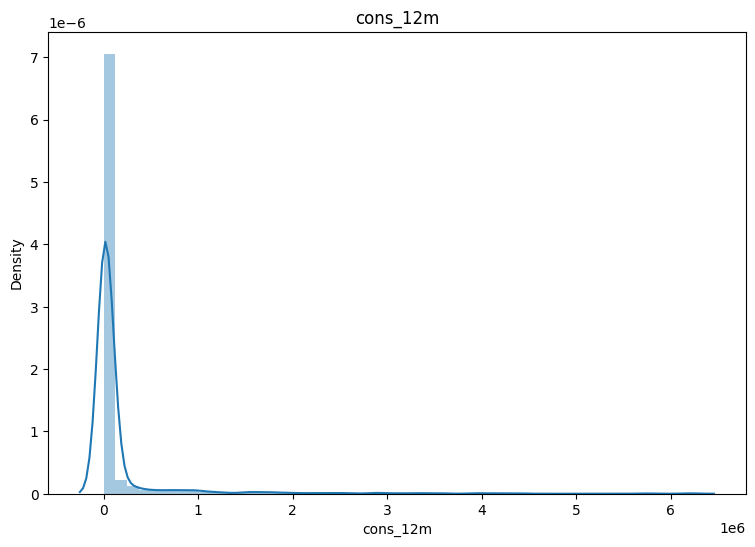

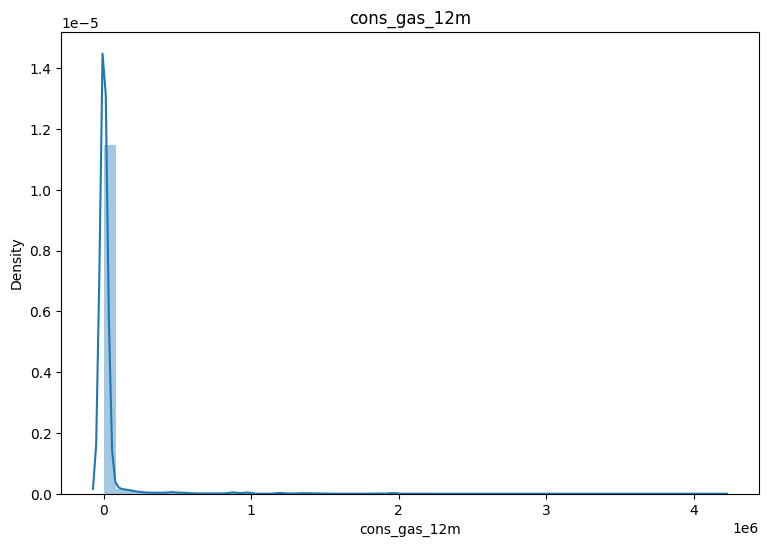

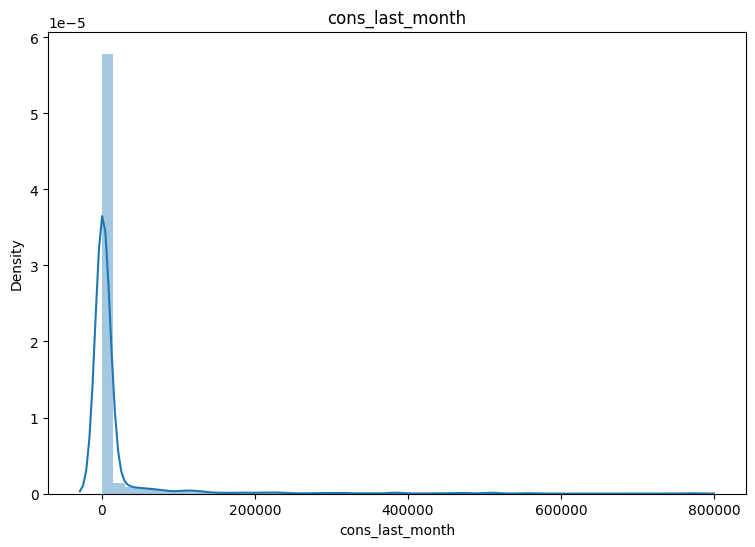

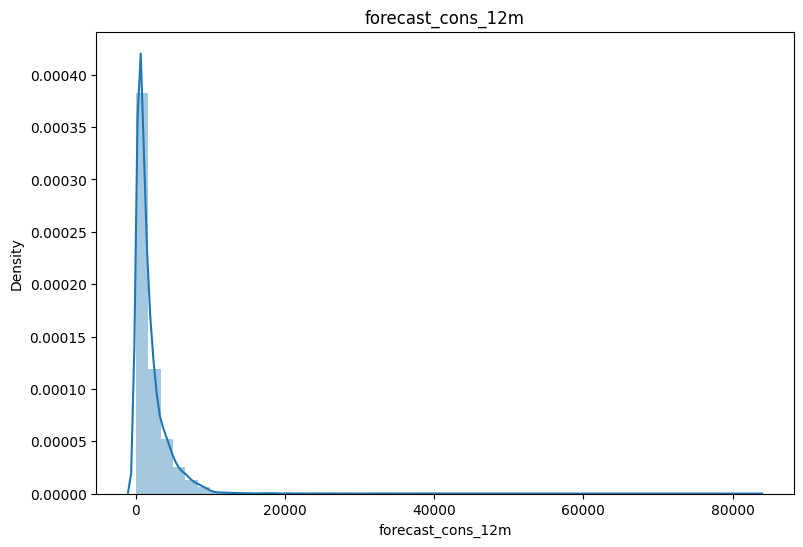

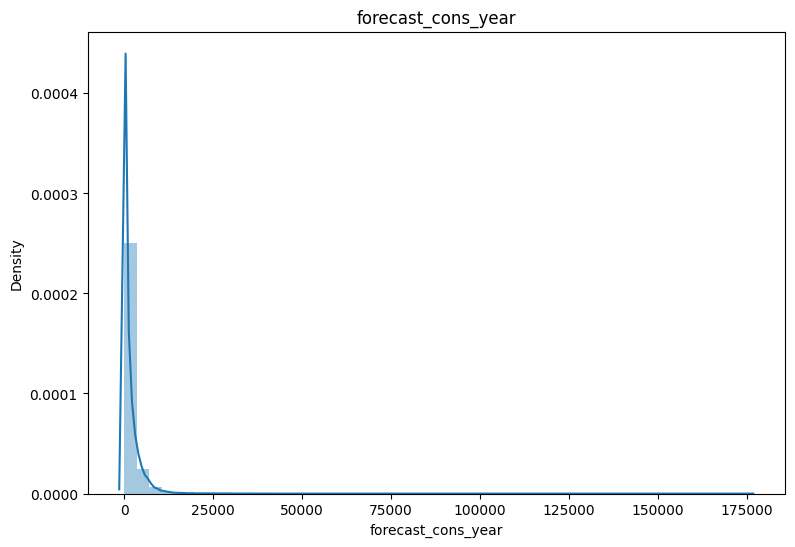

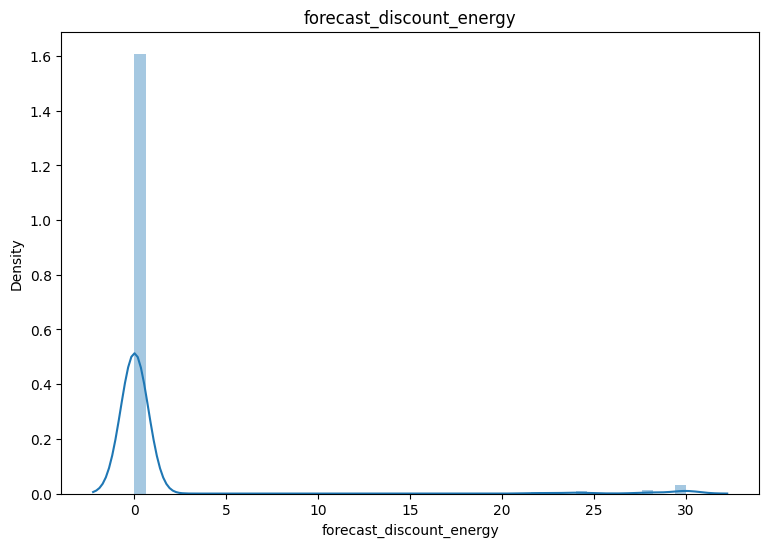

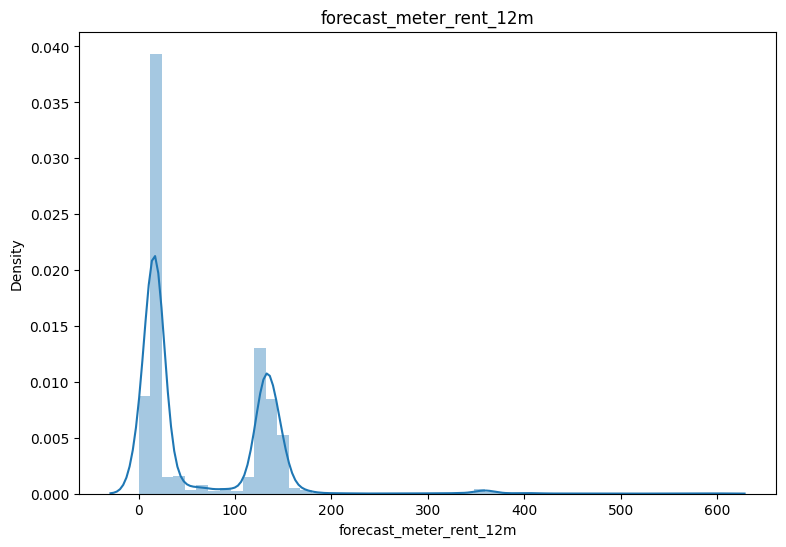

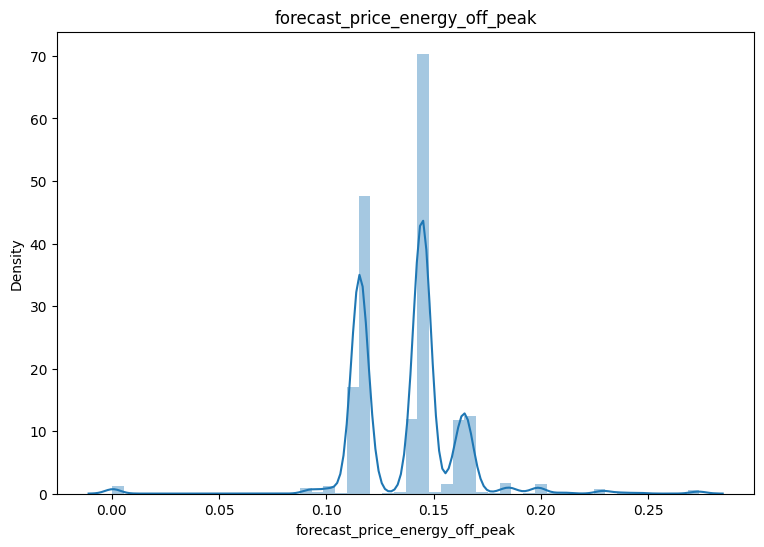

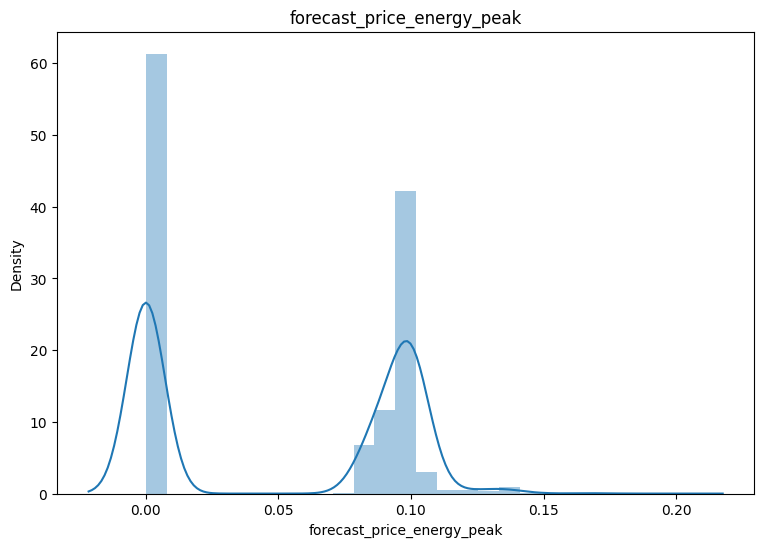

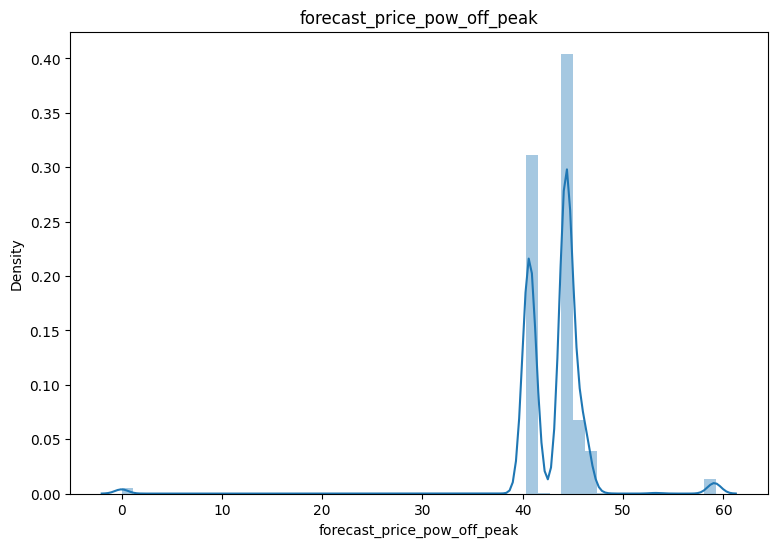

In [ ]:
#Ploting a histogram for each numeric feature
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    sns.distplot(feature, ax = ax)
    ax.set_title(col)
plt.show()

As we can see, the majority of these traits have rather substantial standard deviations. We will add a constant of 1 to each value because we are unable to apply log to a value of 0.

In [ ]:
for i in numeric_features:
    df[i]=df[i].apply(lambda x:np.log(1+x))

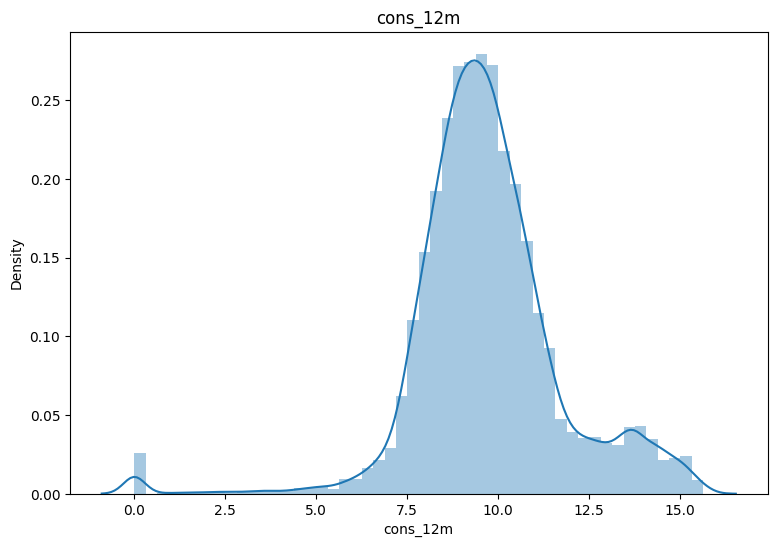

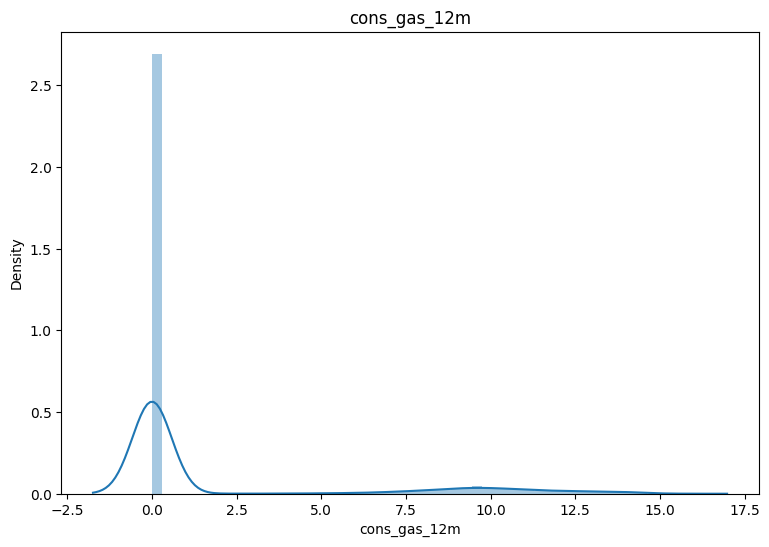

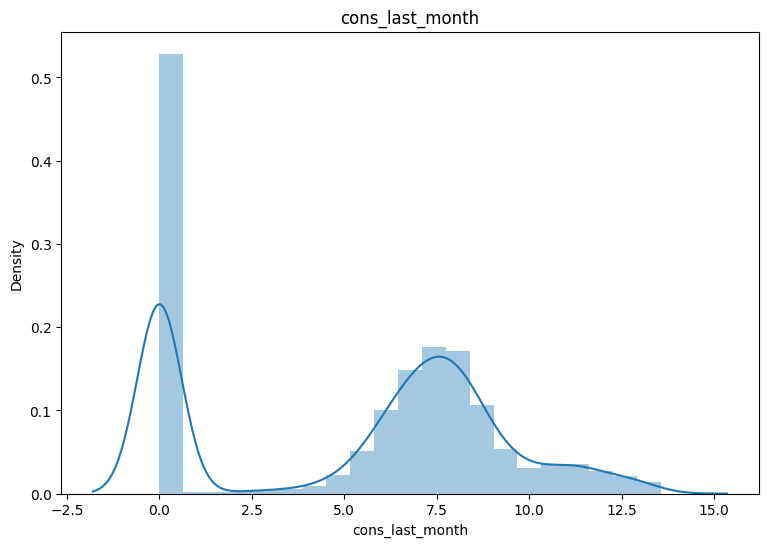

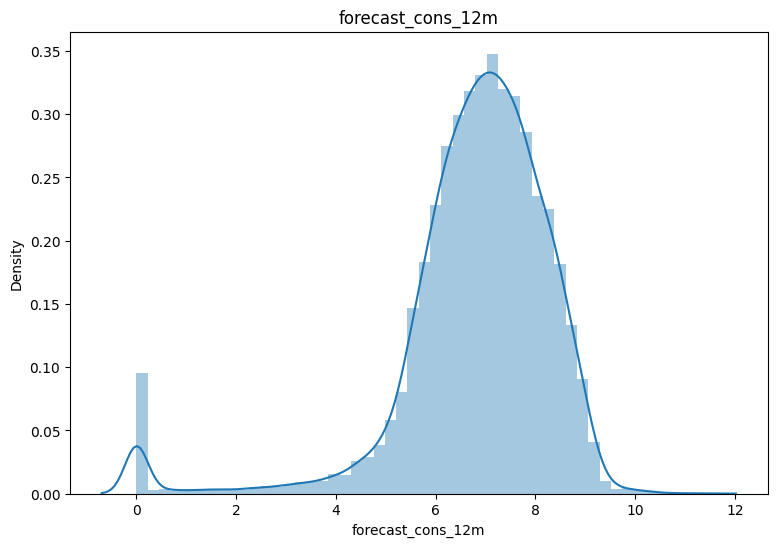

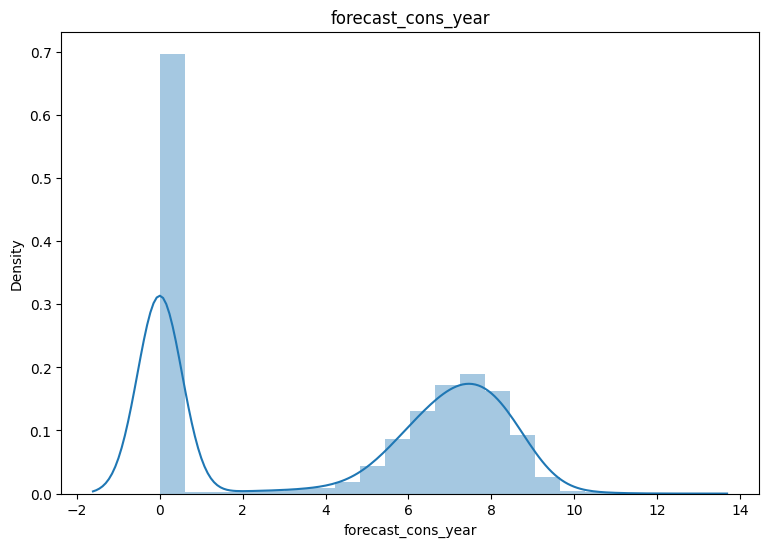

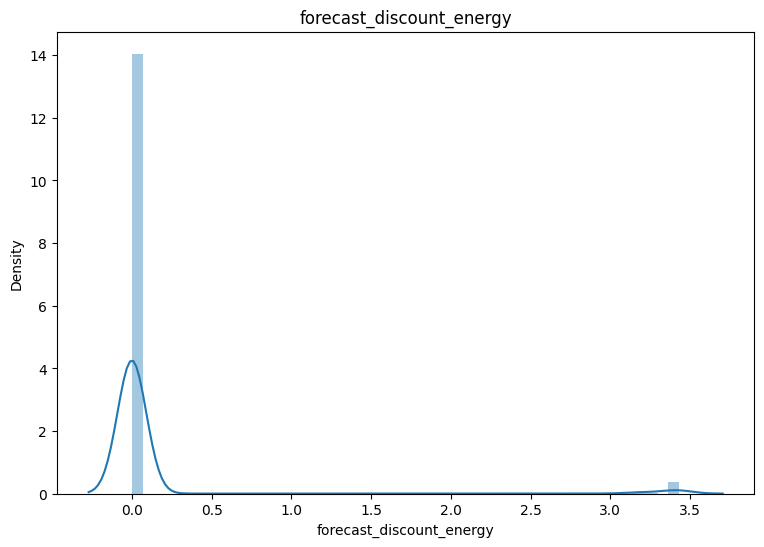

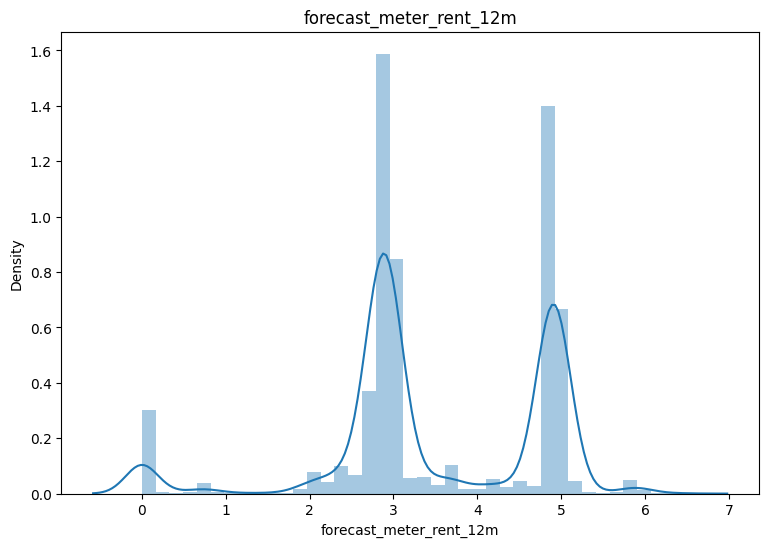

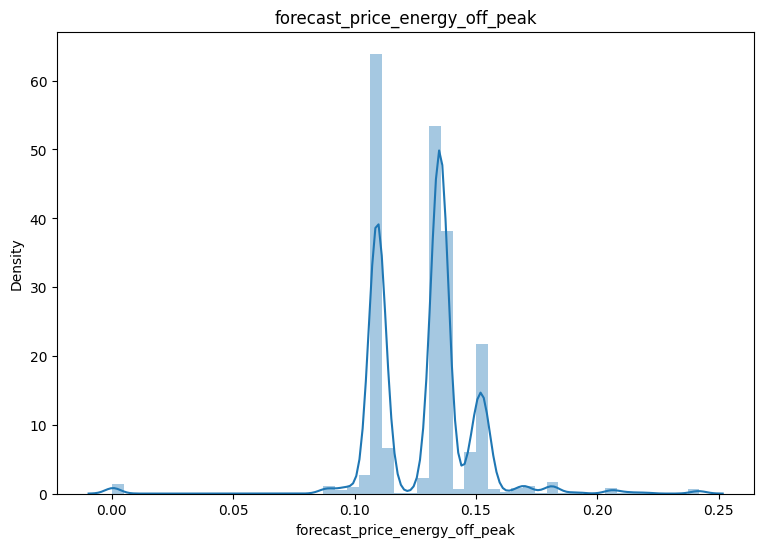

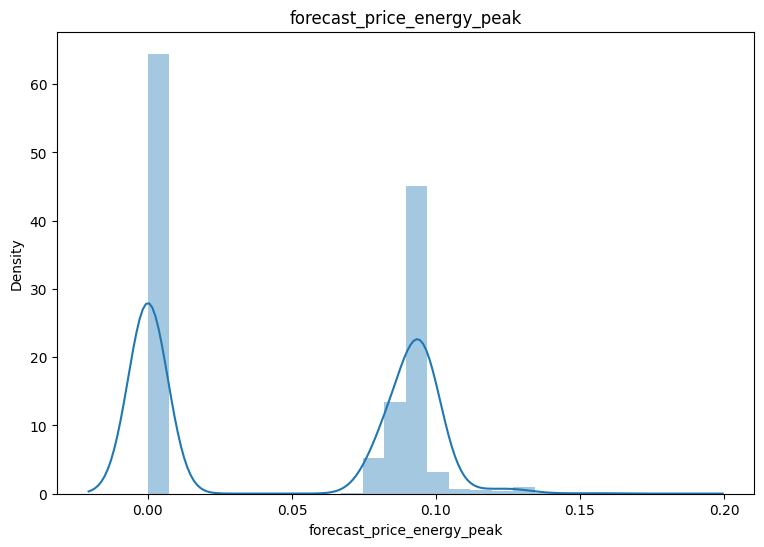

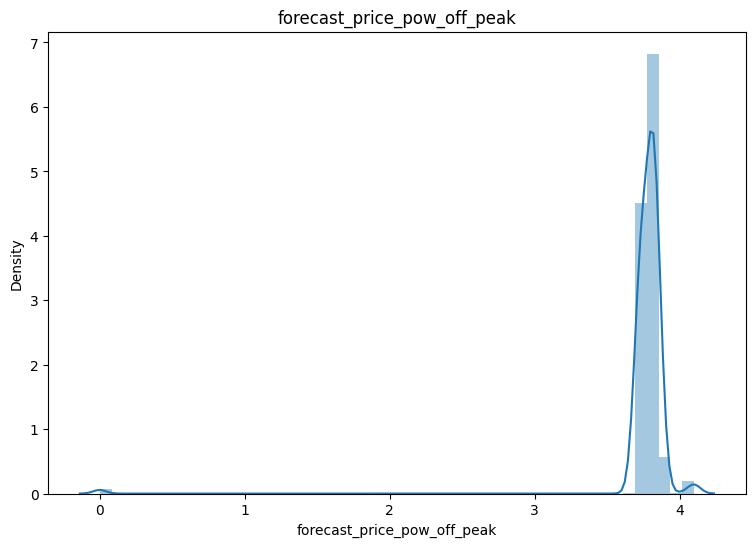

In [ ]:
#Ploting a histogram for each numeric feature
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    sns.distplot(feature, ax = ax)
    ax.set_title(col)
plt.show()

The linear relationships between features are shown by correlation. As this will show that characteristics are good predictors of churn, we want them to correlate with it. On the other hand, highly correlated traits may not always be reliable. This is due to the fact that two columns with a high correlation may contain a significant amount of identical data.Each feature must be completely independent of every other feature in order for it to be considered independent. We can eliminate two traits if they have a strong correlation and share similar data.

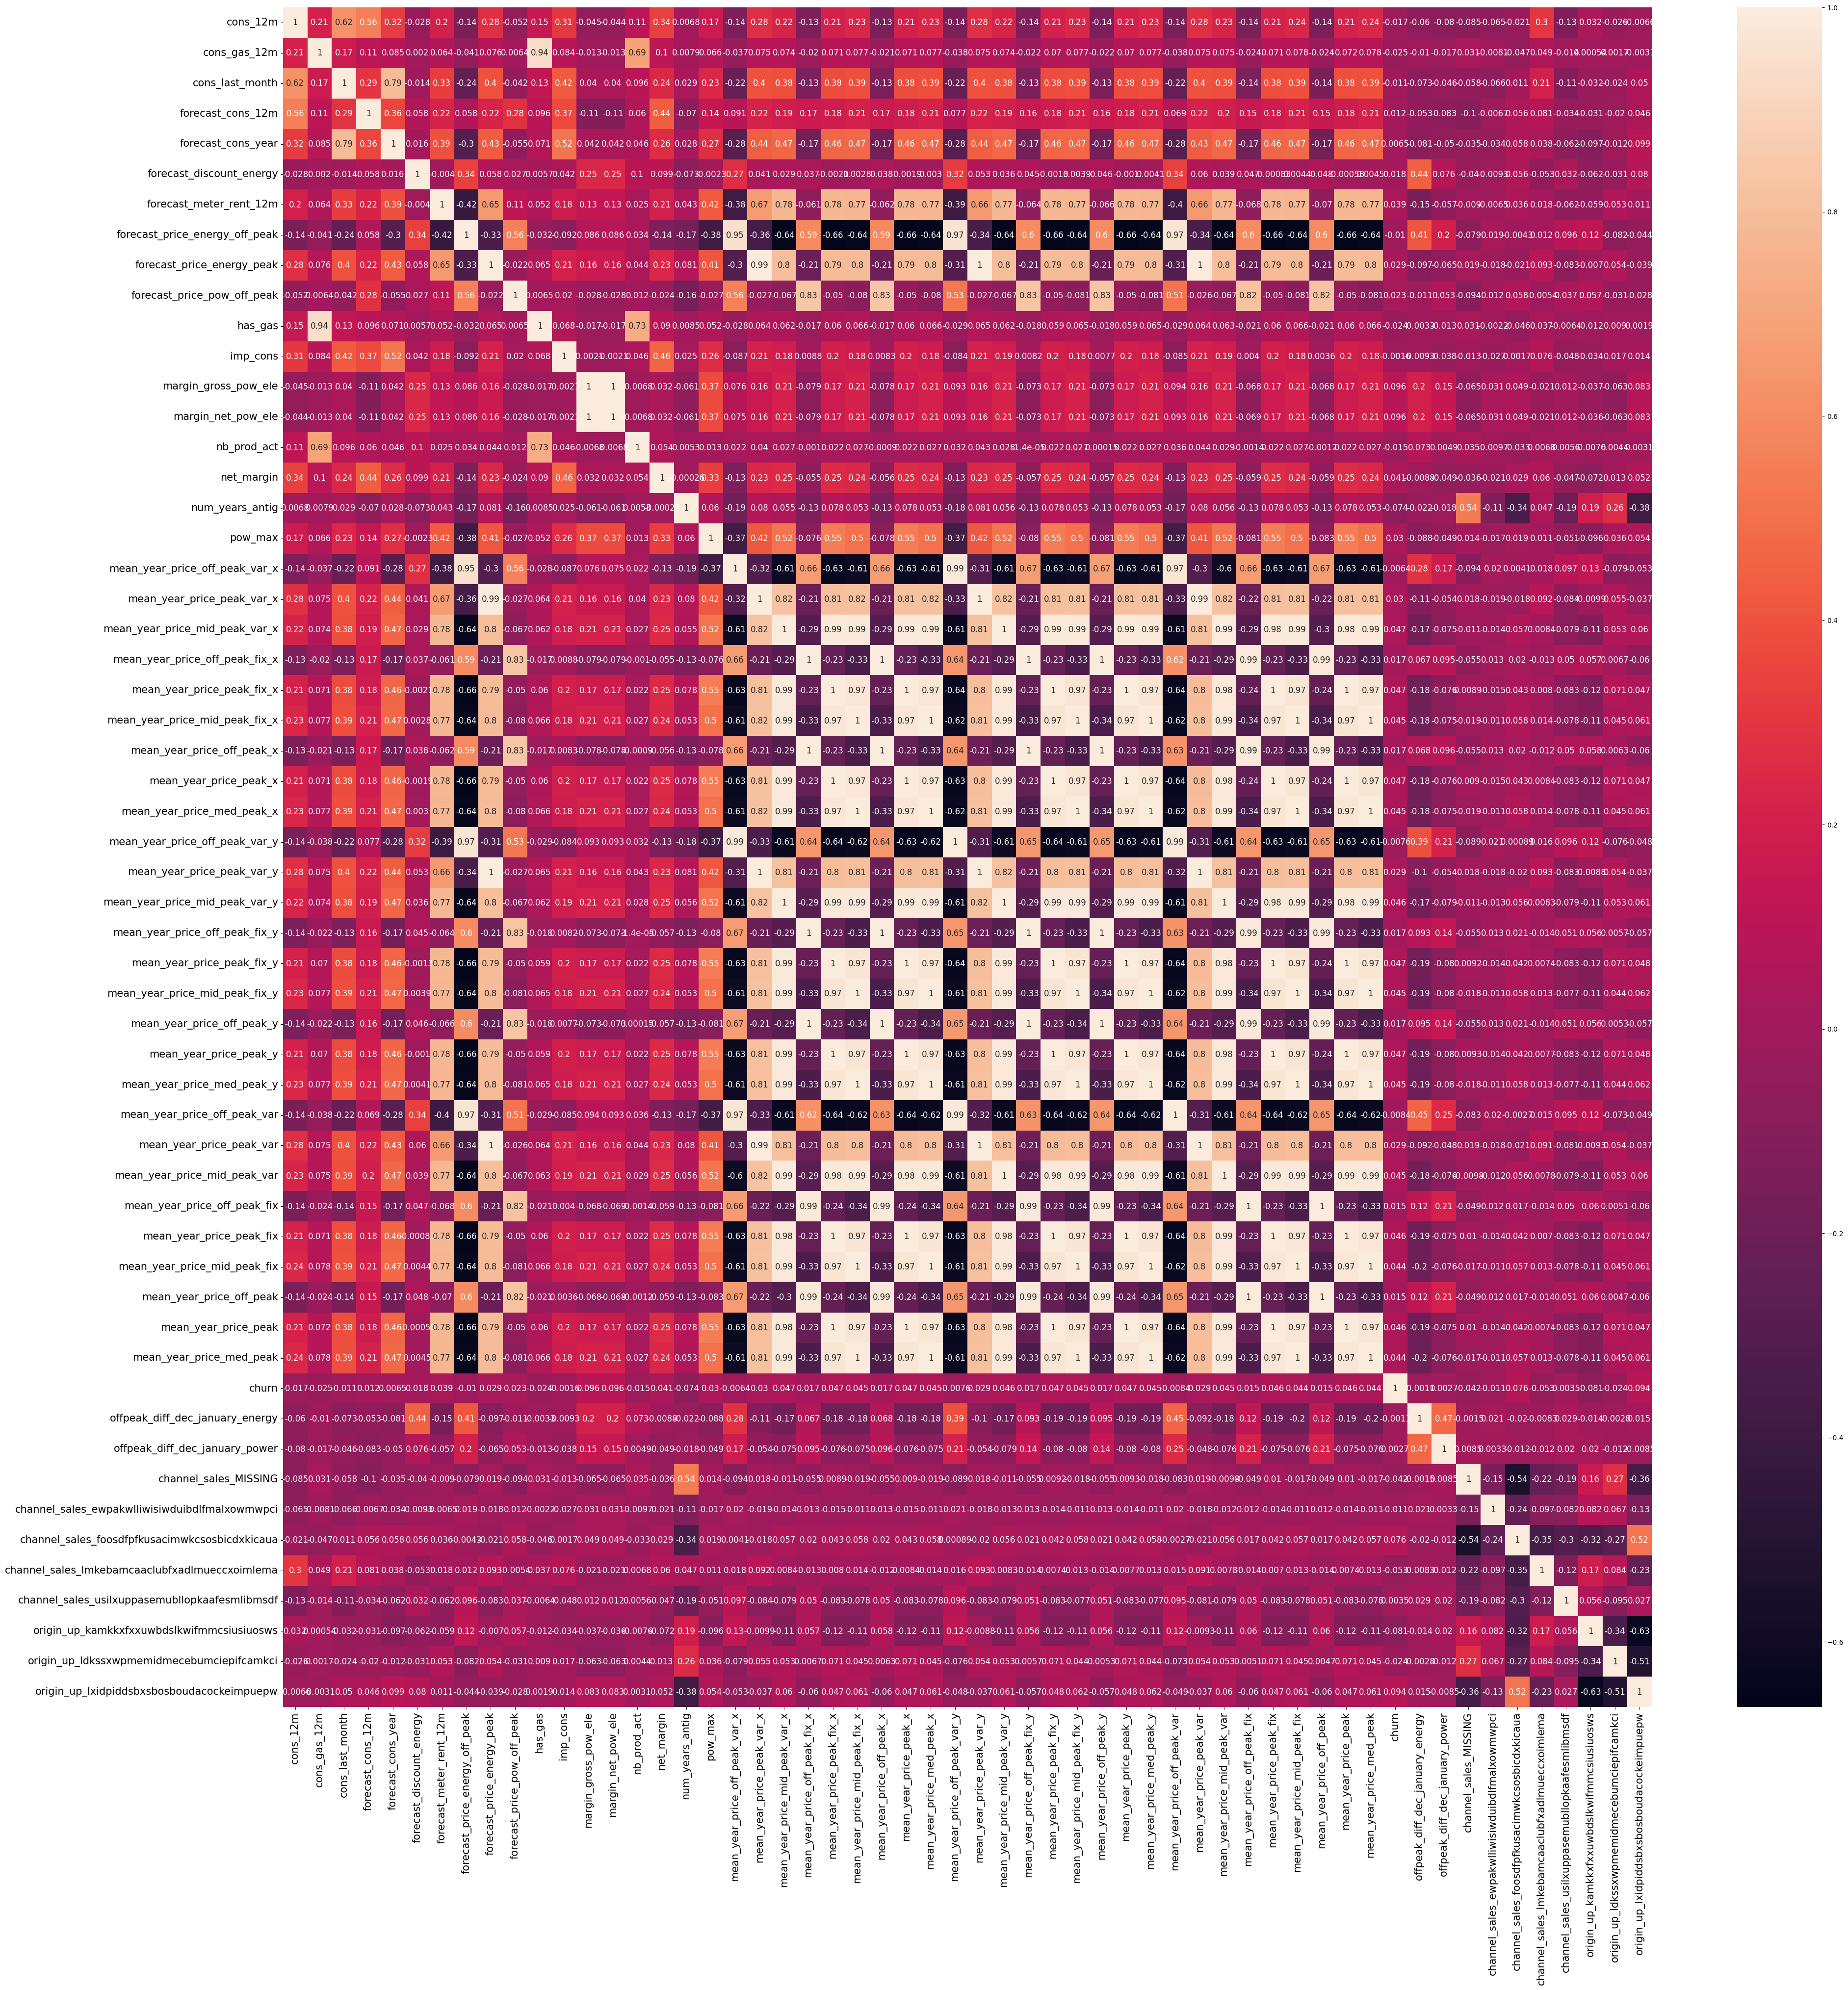

In [ ]:
#correlation map
correlation = df.corr()
plt.figure(figsize=(45, 45))
sns.heatmap(
    correlation,
    xticklabels=correlation.columns.values,
    yticklabels=correlation.columns.values,
    annot=True,
    annot_kws={'size': 12}
)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

# 4. Building Prediction Models

In [ ]:
#Separating target variable from independent variables
X = df.drop(columns=['id', 'churn'])
y = df['churn']

In [ ]:
#Spliting data into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

Training cases: 10223
Test cases: 4382


In [ ]:
from imblearn.over_sampling import SMOTE
X, y = SMOTE().fit_resample(X, y)

In [ ]:
#checking the number of target variable after oversampling using SMOTE
from collections import Counter
print('Resample dataset shape', Counter(y))

Resample dataset shape Counter({1: 13186, 0: 13186})


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10223, 55)
(10223,)
(4382, 55)
(4382,)


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_RF = RandomForestClassifier(n_estimators = 1000).fit(X_train, (y_train))
print (model_RF)

RandomForestClassifier(n_estimators=1000)


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
y_pred_RF = model_RF.predict(X_test)
y_scores_RF = model_RF.predict_proba(X_test)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred_RF).ravel()
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

True positives: 23
False positives: 7
True negatives: 3982
False negatives: 370



In [ ]:
from sklearn. metrics import classification_report
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      3989
           1       0.77      0.06      0.11       393

    accuracy                           0.91      4382
   macro avg       0.84      0.53      0.53      4382
weighted avg       0.90      0.91      0.88      4382



In [ ]:
from sklearn.metrics import precision_score, recall_score
print('Accuracy:', accuracy_score(y_test, y_pred_RF))
print("Overall Precision:",precision_score(y_test, y_pred_RF))
print("Overall Recall:",recall_score(y_test, y_pred_RF))

Accuracy: 0.9139662254678229
Overall Precision: 0.7666666666666667
Overall Recall: 0.058524173027989825



AUC: 0.6756385403370719


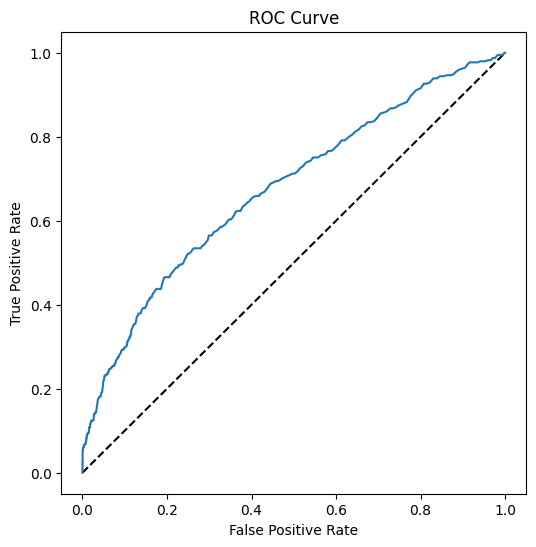

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test,y_scores_RF[:,1])
print('\nAUC: ' + str(auc))
#ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores_RF[:,1])
fig = plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Model Understanding (Feature_Importances)

In [ ]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': model_RF.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()

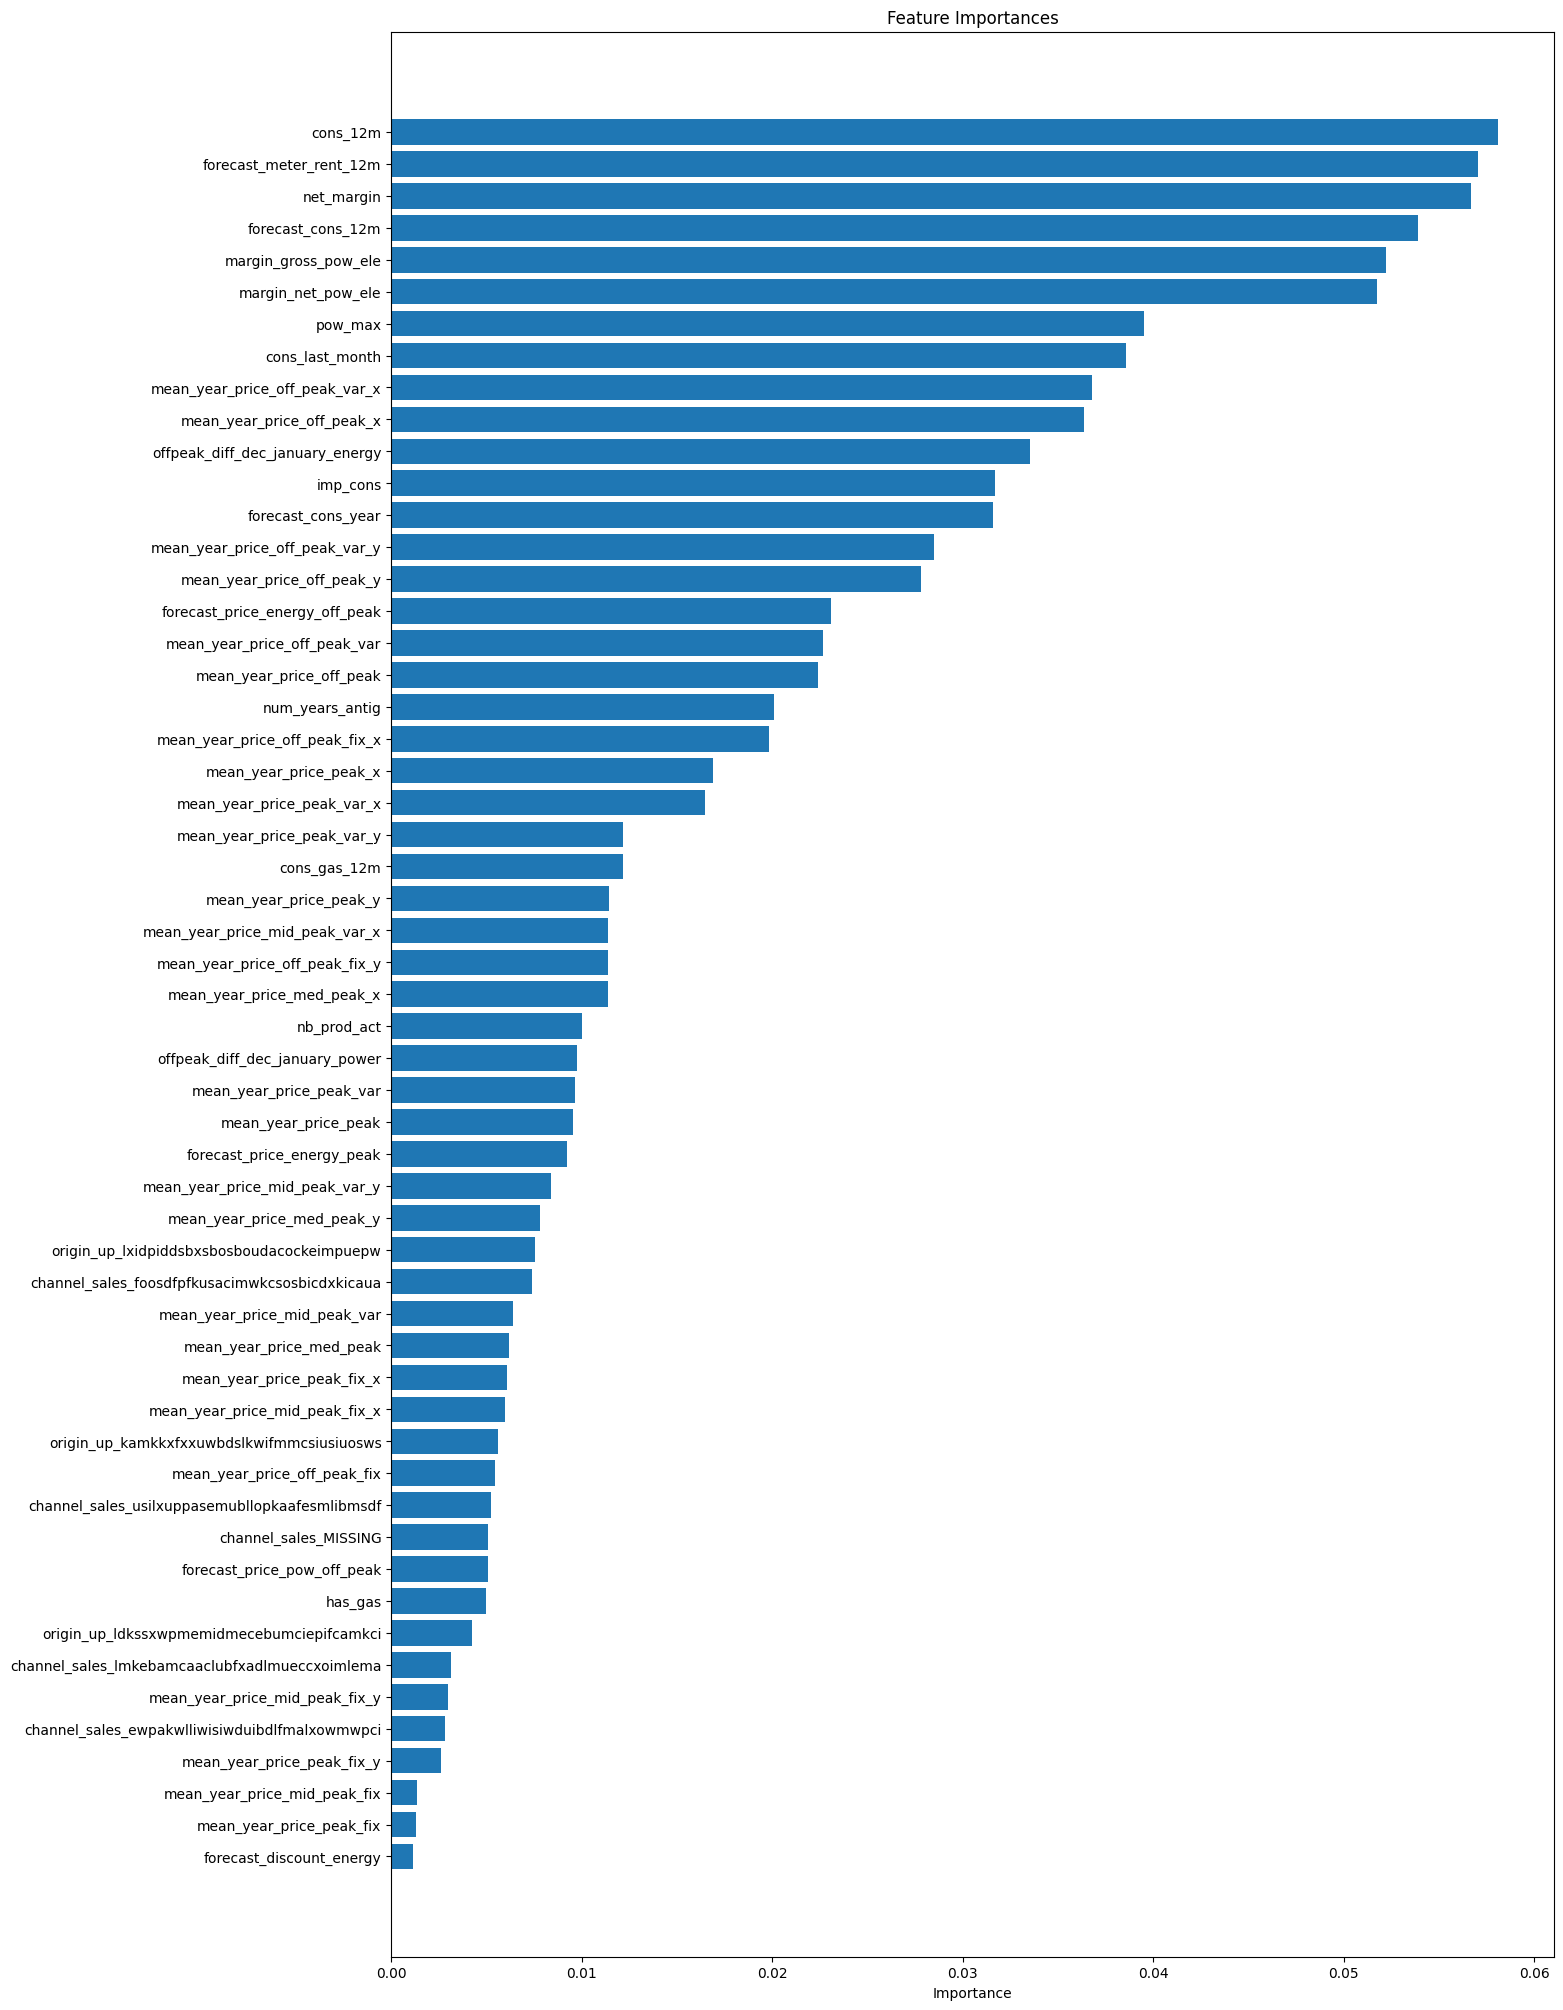

In [ ]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

In [ ]:
X_test = X_test.reset_index()
X_test.drop(columns='index', inplace=True)

In [ ]:
y_scores = model_RF.predict_proba(X_test)
probabilities = y_scores[:, 1]

In [ ]:
X_test['churn'] = y_pred_RF.tolist()
X_test['churn_probability'] = probabilities.tolist()
X_test.to_csv('data_with_predictions.csv')